In [389]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import math,datetime
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [390]:
df = pd.read_csv('../datasets/GOOG.csv')
df.index = np.array(df['Date'])
df  = df[['Open','High','Low','Close','Volume']]
df['HL_PCT'] = (df['High'] - df['Close'] / df['Close']) * 100
df['PCT_CHANGE'] = (df['Close'] - df['Open'] / df['Open']) * 100

df.head()

,Open,High,Low,Close,Volume,HL_PCT,PCT_CHANGE
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,159.1785,149.9133
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,171.6817,169.7639
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,182.6406,172.4787
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,177.9581,161.1960
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,168.9918,164.0104


In [391]:
df = df[['HL_PCT','PCT_CHANGE',  'Close', 'Volume']]
df.head()
forecast_col = 'Close'
df.fillna(-9999,inplace=True)
forecast_out = int(math.ceil(0.1*len(df)))
df['label'] =  df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [392]:
X = np.array(df.drop(['label'], axis=1))
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
X = preprocessing.scale(X)
Y = np.array(df['label'])

Y = Y[:-forecast_out]
df.dropna(inplace=True)



In [393]:
x_train ,  x_test , y_train  , y_test  = train_test_split(X,Y,test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(x_train,y_train)

''' for save the model '''

# with open('LinearRegression.pickle','wb') as f:
#     pickle.dump(clf,f)

# pickle_clf = open('LinearRegression.pickle','rb')
# clf = pickle.load(pickle_clf)

clf.coef_
accuracy = clf.score(x_test,y_test)
forecast_set = clf.predict(X_lately)
print(accuracy)


0.8751814264094224


core regression

In [407]:
def best_fit_and_y_intersecpt(x,y):
    m = ( (mean(x) * mean(y)) - mean((x*y)) ) / (( mean(x) **2 ) - ( mean(x**2) ) ) 
    b = mean(y) - (m*mean(x))
    return m ,b

x = np.array([1,2,3,4,5],dtype=np.float64)
y = np.array([2,4,6,8,10],dtype=np.float64)

m , b = best_fit_and_y_intersecpt(x,y)

line = [m*i + b for i in x]

x_predict = 6
y_predict = m*x_predict + b


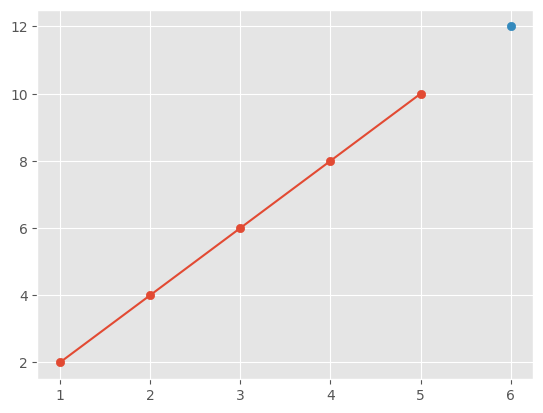

In [408]:
plt.scatter(x,y)
plt.scatter(x_predict,y_predict)
plt.plot(x,line)